In [32]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# BAYESIAN ESTIMATION

## Example with coin toss

creating the prior

[ 0.          0.04166667  0.08333333  0.125       0.16666667  0.20833333
  0.25        0.29166667  0.33333333  0.375       0.41666667  0.45833333
  0.5         0.54166667  0.58333333  0.625       0.66666667  0.70833333
  0.75        0.79166667  0.83333333  0.875       0.91666667  0.95833333
  1.        ]
[ 0.    0.    0.    0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.5
  0.    0.    0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.  ]


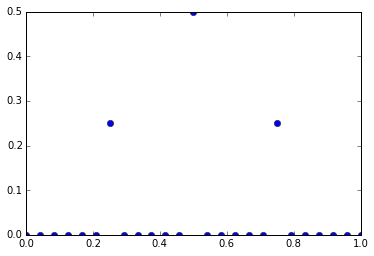

In [18]:
theta = np.linspace(0.0,1.0,25)
print theta
prior = np.zeros(theta.shape[0])
prior[6] = 0.25
prior[12] = 0.5
prior[18] = 0.25
print prior
pb.plot(theta, prior, 'bo')

computing the likelihood

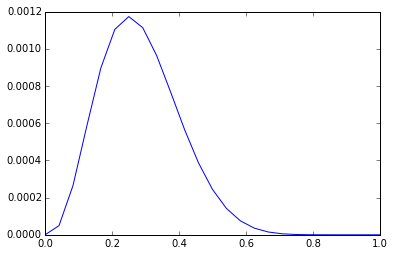

In [21]:
likelihood = np.multiply(np.power(theta, 3),np.power(1.0 - theta, 9))
pb.plot(theta, likelihood)

Computing the posterior

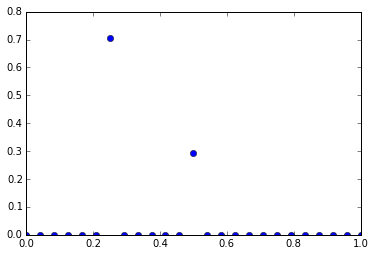

In [29]:
posterior = np.multiply(likelihood, prior)
normalizer = np.sum(posterior)
posterior = posterior*(1.0/normalizer)
pb.plot(theta, posterior, 'bo')

## Example of computing the posterior with a Gaussian model

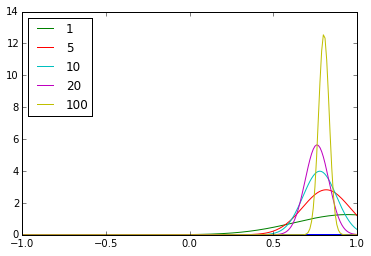

In [71]:

mean = 0.8
var = 0.1
N = 100
X = np.random.normal(mean, np.sqrt(var), N)
X_eval = np.linspace(-1.0,1.0,200)
mean_prior = 0.0
var_prior = 10.0
n_dat = [1,5,10,20,100]
Y = norm.pdf(X_eval, mean_prior, var_prior)
pb.plot(X_eval,Y)
for n in n_dat:
    mean_ml = (1.0/n)*np.sum(X[0:n])
    posterior_mean = ((var/(n*var_prior + var))*mean_prior) + (n*var_prior/(n*var_prior + var))*mean_ml
    posterior_var = (var_prior*var)/(n*var_prior + var)
    y = norm.pdf(X_eval, posterior_mean, np.sqrt(posterior_var))
    mlabel = str(n)
    pb.plot(X_eval, y, label=mlabel)
    pb.legend(loc='upper left')